In [ ]:
import xarray as xr
import rioxarray
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import datashader

In [2]:
df = pd.read_csv('data/tokyo_clean.csv')
df

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06
...,...,...,...,...,...,...,...
9995,26981415@N00,139.582672,35.532785,2007-10-29 17:06:59.0,http://www.flickr.com/photos/26981415@N00/1797...,1.553827e+07,4.236522e+06
9996,36516818@N00,139.749461,35.696870,2006-08-26 13:59:06.0,http://www.flickr.com/photos/36516818@N00/2623...,1.555684e+07,4.258991e+06
9997,92996378@N00,139.770298,35.670336,2007-03-19 16:37:15.0,http://www.flickr.com/photos/92996378@N00/4321...,1.555916e+07,4.255354e+06
9998,95795770@N00,139.739075,35.642470,2008-08-13 17:12:36.0,http://www.flickr.com/photos/95795770@N00/2759...,1.555568e+07,4.251537e+06


In [6]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(
    df.longitude, df.latitude), crs='EPSG:4326')
gdf

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y,geometry
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06,POINT (139.70050 35.67400)
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06,POINT (139.76652 35.70909)
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06,POINT (139.76563 35.69448)
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06,POINT (139.78439 35.54859)
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06,POINT (139.76875 35.67152)
...,...,...,...,...,...,...,...,...
9995,26981415@N00,139.582672,35.532785,2007-10-29 17:06:59.0,http://www.flickr.com/photos/26981415@N00/1797...,1.553827e+07,4.236522e+06,POINT (139.58267 35.53278)
9996,36516818@N00,139.749461,35.696870,2006-08-26 13:59:06.0,http://www.flickr.com/photos/36516818@N00/2623...,1.555684e+07,4.258991e+06,POINT (139.74946 35.69687)
9997,92996378@N00,139.770298,35.670336,2007-03-19 16:37:15.0,http://www.flickr.com/photos/92996378@N00/4321...,1.555916e+07,4.255354e+06,POINT (139.77030 35.67034)
9998,95795770@N00,139.739075,35.642470,2008-08-13 17:12:36.0,http://www.flickr.com/photos/95795770@N00/2759...,1.555568e+07,4.251537e+06,POINT (139.73908 35.64247)


<Axes: >

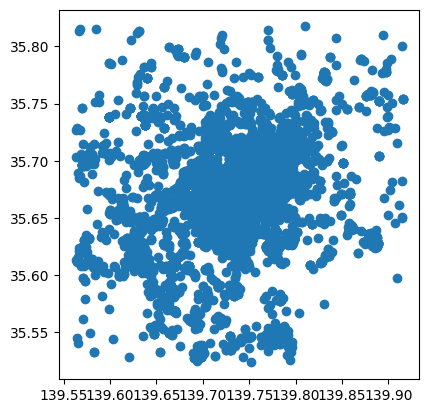

In [7]:
gdf.plot()

In [23]:
cvs = datashader.Canvas(plot_width=60, plot_height=60)

In [31]:
cvs = datashader.Canvas(plot_width=60, plot_height=60)
grid = cvs.points(gdf, x='longitude', y='latitude')
grid

<xarray.DataArray (latitude: 60, longitude: 60)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]], dtype=uint32)
Coordinates:
  * longitude  (longitude) float64 139.6 139.6 139.6 139.6 ... 139.9 139.9 139.9
  * latitude   (latitude) float64 35.53 35.53 35.54 35.54 ... 35.81 35.81 35.82
Attributes:
    x_range:  (139.562972, 139.915277)
    y_range:  (35.523416, 35.8175)

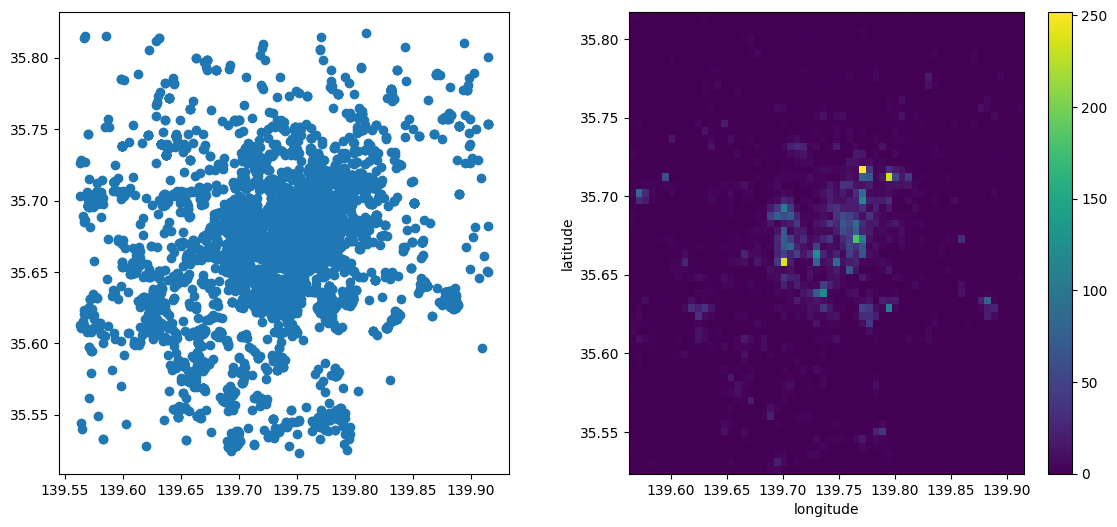

In [32]:
f, axs = plt.subplots(1, 2, figsize=(14, 6))
gdf.plot(ax=axs[0])
grid.plot(ax=axs[1])